This projects includes cleaning and basic EDA operations on cafe_sales dataset.

In [116]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv('cafe_sales.csv')

In [117]:
# Dataset Structure
df.head()
df.tail()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price_Per_Unit    9821 non-null   object
 4   Total_Spent       9827 non-null   object
 5   Payment_Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction_Date  9841 non-null   object
dtypes: object(8)
memory usage: 312.6+ KB


In [118]:
# Datatypes
df.dtypes

Transaction_ID      object
Item                object
Quantity            object
Price_Per_Unit      object
Total_Spent         object
Payment_Method      object
Location            object
Transaction_Date    object
dtype: object

In [119]:
# Summary of Dataset
df.describe()

,Transaction_ID,Item,Quantity,Price_Per_Unit,Total_Spent,Payment_Method,Location,Transaction_Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3,6,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [120]:
# Transpose 
df.describe().T

,count,unique,top,freq
Transaction_ID,10000,10000,TXN_1961373,1
Item,9667,10,Juice,1171
Quantity,9862,7,5,2013
Price_Per_Unit,9821,8,3,2429
Total_Spent,9827,19,6,979
Payment_Method,7421,5,Digital Wallet,2291
Location,6735,4,Takeaway,3022
Transaction_Date,9841,367,UNKNOWN,159


In [121]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

In [122]:
# Check null values
df.isnull().sum()

Transaction_ID         0
Item                 333
Quantity             138
Price_Per_Unit       179
Total_Spent          173
Payment_Method      2579
Location            3265
Transaction_Date     159
dtype: int64

In [123]:
# Missing values Percentage 
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'Missing_Values']
missing_df['Missing_Percent'] = (missing_df['Missing_Values'] / len(df)) * 100
missing_df.sort_values('Missing_Percent', ascending=False)

,column,Missing_Values,Missing_Percent
6,Location,3265,32.65
5,Payment_Method,2579,25.79
1,Item,333,3.33
3,Price_Per_Unit,179,1.79
4,Total_Spent,173,1.73
7,Transaction_Date,159,1.59
2,Quantity,138,1.38
0,Transaction_ID,0,0.00


In [124]:
# Convert Datatypes
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price_Per_Unit'] = pd.to_numeric(df['Price_Per_Unit'], errors='coerce')
df['Total_Spent'] = pd.to_numeric(df['Total_Spent'], errors='coerce')

In [125]:
df.dtypes

Transaction_ID       object
Item                 object
Quantity            float64
Price_Per_Unit      float64
Total_Spent         float64
Payment_Method       object
Location             object
Transaction_Date     object
dtype: object

In [126]:
# Replacing and filling missing values
df['Item'] = df['Item'].replace ( ['UNKNOWN','ERROR'],pd.NA).fillna('NA')
df['Payment_Method'] = df['Payment_Method'].replace ( ['UNKNOWN','ERROR'],pd.NA).fillna('NA')
df['Location'] = df['Location'].replace ( ['UNKNOWN','ERROR'],pd.NA).fillna('NA')
df['Transaction_Date'] = df['Transaction_Date'].replace ( ['UNKNOWN','ERROR'],pd.NA).fillna('NA')

In [127]:
# Float values replace
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price_Per_Unit'] = df['Price_Per_Unit'].fillna(df['Price_Per_Unit'].median())
df['Total_Spent'] = df['Total_Spent'].fillna(df['Total_Spent'].median())


In [128]:
print(df.isnull().sum())

Transaction_ID      0
Item                0
Quantity            0
Price_Per_Unit      0
Total_Spent         0
Payment_Method      0
Location            0
Transaction_Date    0
dtype: int64


In [129]:
# Calculation for quantity and total spent depend on new values
df['Quantity'] = df['Total_Spent'] / df['Price_Per_Unit']
df['Total_Spent'] = df['Quantity'] * df['Price_Per_Unit']


In [130]:
# Save clean CSV file
df.to_csv('cleaned_cafe_sales.csv', index=False)


In [ ]:
# Value Counts

In [131]:
# Value Count for Items 
df['Item'].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
NA           969
Name: count, dtype: int64

In [132]:
# Value Count of Quantity
df['Quantity'].value_counts()

Quantity
2.000000    2058
5.000000    1929
4.000000    1852
1.000000    1796
3.000000    1769
2.666667     164
5.333333      79
8.000000      61
1.600000      55
1.333333      41
6.666667      40
0.666667      34
1.666667      30
3.333333      29
2.500000      18
8.333333      16
1.500000      11
0.333333      10
0.500000       8
Name: count, dtype: int64

In [133]:
df['Total_Spent'].value_counts()

Total_Spent
8.0     1179
6.0      979
12.0     939
3.0      930
4.0      923
20.0     746
15.0     734
10.0     524
2.0      497
9.0      479
5.0      468
16.0     444
25.0     259
7.5      237
1.0      232
4.5      225
1.5      205
Name: count, dtype: int64

In [ ]:
# Visualizations

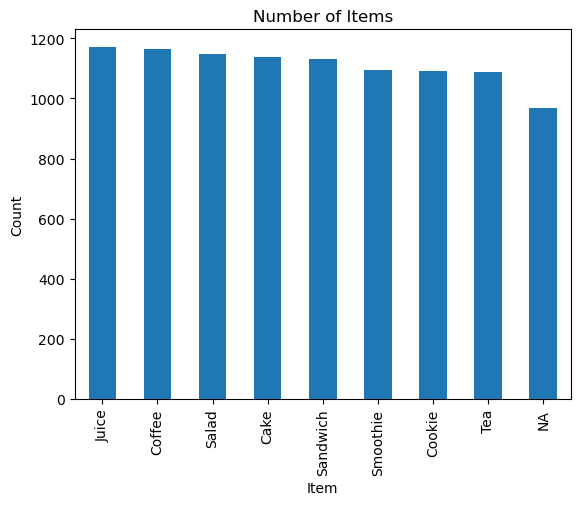

In [137]:
# Bar plot of Items
df['Item'].value_counts().plot(kind='bar')
plt.title('Number of Items')
plt.xlabel('Item')
plt.ylabel('Count')
plt.show()
                               